In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.preprocessing
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
 

In [5]:
df = pd.read_csv('svm_regression_dataset_300.csv')
df

,Feature1,Feature2,Feature3,Target
0,-2.509198,5.168172,-2.079088,-0.817137
1,9.014286,53.135463,-1.390453,59.530931
2,4.639879,54.063512,-2.028374,-12.537132
3,1.973170,63.742990,-2.582948,-51.933884
4,-6.879627,72.609133,-2.382407,1.841503
...,...,...,...,...
295,0.444865,47.396164,-1.852699,-63.559232
296,5.399871,66.755774,-1.299032,-21.277116
297,-5.683579,17.231987,2.488989,35.285721
298,2.457810,19.228902,-3.058348,-15.166326


In [6]:
X = df[['Feature1','Feature2']].values
y = df['Target'].values

In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled


array([[-4.10633520e-01, -1.51993259e+00],
       [ 1.55014594e+00,  6.79381181e-02],
       [ 8.05818259e-01,  9.86595075e-02],
       [ 3.52064111e-01,  4.19081178e-01],
       [-1.15428438e+00,  7.12578867e-01],
       [-1.15436646e+00,  1.53936679e+00],
       [-1.48756725e+00,  1.81036270e-02],
       [ 1.26245397e+00, -6.21926420e-01],
       [ 3.60423925e-01,  9.41304950e-01],
       [ 7.24411420e-01, -7.94474260e-01],
       [-1.61518057e+00, -2.37879848e-01],
       [ 1.61547034e+00, -1.43129990e+00],
       [ 1.14765542e+00, -1.60709654e+00],
       [-9.62620077e-01,  1.49565844e+00],
       [-1.06646282e+00,  1.07634589e+00],
       [-1.06108747e+00,  6.12881545e-01],
       [-6.49864354e-01, -3.37250603e-01],
       [ 1.00567897e-01, -1.11735600e+00],
       [-2.15278798e-01, -1.17315898e+00],
       [-6.94149269e-01, -8.62631602e-01],
       [ 3.96966035e-01,  1.27100262e-01],
       [-1.21051988e+00,  6.74525381e-01],
       [-6.91033701e-01,  4.94448801e-01],
       [-4.

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=31)

Kernel: LINEAR||Accuracy:0.34


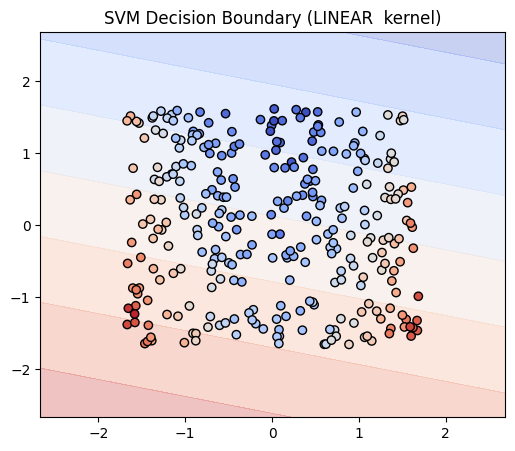

Kernel: POLY||Accuracy:0.37


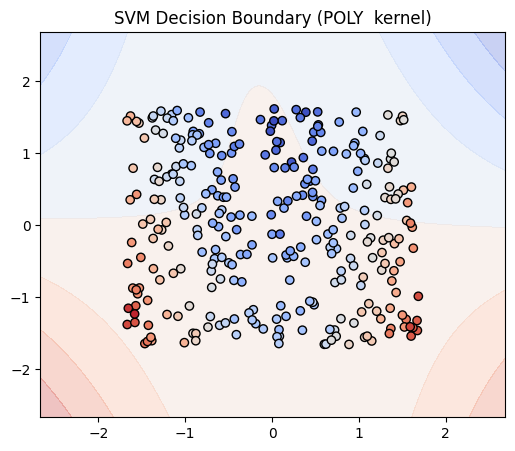

Kernel: SIGMOID||Accuracy:-131.48


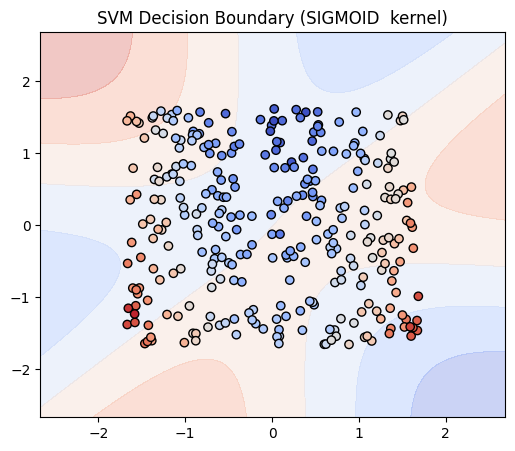

Kernel: RBF||Accuracy:0.96


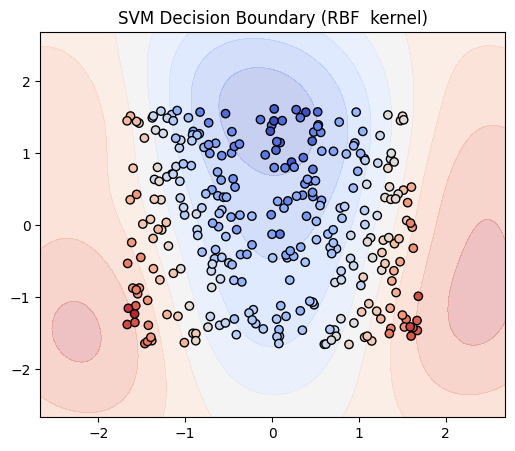

In [11]:
kernels = ['linear','poly','sigmoid','rbf']


for kernel in kernels:
    svm = SVR(kernel=kernel,C =100,gamma='auto',epsilon=0.2)
    svm.fit(X_train,y_train)

    acc = svm.score(X_test,y_test)
    print(f'Kernel: {kernel.upper()}||Accuracy:{acc:.2f}')    


    plt.figure(figsize=(6,5))
    plt.title(f'SVM Decision Boundary ({kernel.upper()}  kernel)')
    x_min,x_max = X_scaled[:,0].min()-1, X_scaled[:, 0].max()+1
    y_min,y_max = X_scaled[:,0].min()-1, X_scaled[:, 0].max()+1
    xx, yy = np.meshgrid(np.linspace(x_min,x_max,300),
                         np.linspace(y_min,y_max,300))
    

    Z = svm.predict(np.c_[xx.ravel(),yy.ravel()])
    Z = Z.reshape(xx.shape)


    plt.contourf(xx,yy,Z,alpha=0.3,cmap=plt.cm.coolwarm)
    plt.scatter(X_scaled[:,0],X_scaled[:,1],c=y,cmap=plt.cm.coolwarm,edgecolor='k')
    plt.show()